In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def tanh_related(hidden):
    return 2**hidden

def perm_related(hidden):
    return math.factorial(hidden)

def per_layer(hidden):
    return perm_related(hidden) * tanh_related(hidden)

def per_mlp(hidden_layers):
    total = 1
    for hl in hidden_layers:
        ks_layer = per_layer(hl)
        total *= ks_layer
    return total

In [3]:
print("{:e}".format(per_mlp([16])))

1.371196e+18


In [4]:
h = 128

x = np.arange(h)
y_tanh = []
y_perm = []
y = []
for element in range(h):
    y_tanh.append(tanh_related(element))
    y_perm.append(perm_related(element))
    y.append(per_mlp([element]))

y_tanh = np.array(y_tanh, dtype=np.float64)
y_perm = np.array(y_perm, dtype=np.float64)
y = np.array(y, dtype=np.float64)

(array([1.e-044, 1.e-013, 1.e+018, 1.e+049, 1.e+080, 1.e+111, 1.e+142,
        1.e+173, 1.e+204, 1.e+235, 1.e+266, 1.e+297]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

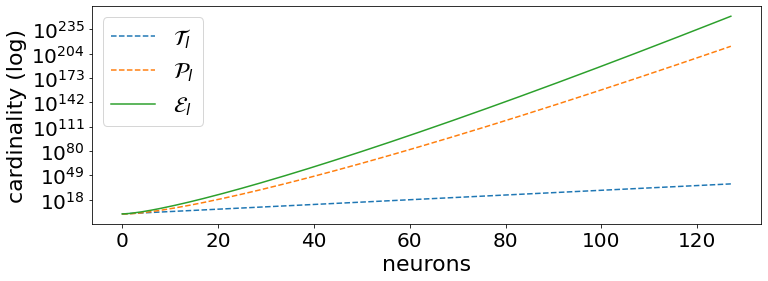

In [5]:
figure = plt.figure(figsize=(12, 4))
ax = figure.add_subplot(1, 1, 1)
ax.set_xlabel("neurons")
ax.set_ylabel("cardinality (log)")
ax.set_yscale("log")

#ax.plot(x, np.log(y_tanh), linestyle="dashed", label=r"$\log |\mathcal{T}_l|$")
#ax.plot(x, np.log(y_perm), linestyle="dashed", label=r"$\log |\mathcal{P}_l|$")
#ax.plot(x, np.log(y), label=r"$\log |\mathcal{E}_l|$")
ax.plot(x, (y_tanh), linestyle="dashed", label=r"$\mathcal{T}_l$")
ax.plot(x, (y_perm), linestyle="dashed", label=r"$\mathcal{P}_l$")
ax.plot(x, (y), label=r"$\mathcal{E}_l$")

textsize = 22
ax.yaxis.label.set_size(textsize)
ax.xaxis.label.set_size(textsize)
ax.legend(prop={"size": textsize})
plt.xticks(fontsize=textsize - 2)
plt.yticks(fontsize=textsize - 2)

In [6]:
import global_settings
import os
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "cardinality_log_scale.pdf"), bbox_inches="tight", transparent=True, dpi=300)

# scatter plots

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib agg
from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import jax
import jax.numpy as jnp
import numpy as np
import visualization
from data import standardize
from utils import results, experiments, settings, equioutput, evaluation, graphs
import global_settings
import os
import matplotlib

In [8]:
tanh_planes = 2
k = 1024
sim = "rbf"

In [9]:
result = results.ResultSample.load_from_file(
    # 1 hl, 3 hn
    "/home/gw/data/experiments/master_thesis/results/1cd0fb4d70b0c0c9bc850afe49a45128.tar.gz"
)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()
print(experiment._settings)

SettingsExperimentSample(output_path='/home/ubuntu/data/experiments/master_thesis/results', dataset='sinusoidal', dataset_normalization='standardization', hidden_layers=1, hidden_neurons=3, activation='tanh', activation_last_layer='none', num_warmup=1024, statistic='reduced', statistic_p=0.99, samples_per_chain=1, identifiable_modes=3, pool_size=10, seed=0, overwrite_chains=None)


In [10]:
folder = os.path.join(global_settings.PATH_RESULTS, result.identifier)
file_name = os.path.join(folder, f"{result.identifier}_{tanh_planes}_{k}_{sim}.npy")
#file_name = os.path.join(folder, f"{result.identifier}_fixed.npy")
#file_name = "/home/gw/mt_code/notebooks/99_other/permutation_removal_history_0.pny.npy"
print(file_name)

samples_parameters_reduced = None
if os.path.exists(file_name):
    samples_parameters_reduced = jnp.load(file_name)
    print(samples_parameters_reduced.shape)

/home/gw/data/experiments/master_thesis/results/1cd0fb4d70b0c0c9bc850afe49a45128/1cd0fb4d70b0c0c9bc850afe49a45128_2_1024_rbf.npy
(1274, 10)


In [11]:
sequential_helper = equioutput.SequentialHelper(
    transformation=experiment._model_transformation,
    dataset=experiment._dataset
)
structured_sequential_samples_parameters = sequential_helper.structured_sequential_samples_parameters(
    samples_parameters=samples_parameters_reduced
    #samples_parameters=result.samples["parameters"]
)
symmetry_helper = equioutput.SymmetryHelper(structured_sequential_samples_parameters)

100%|████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.03it/s]


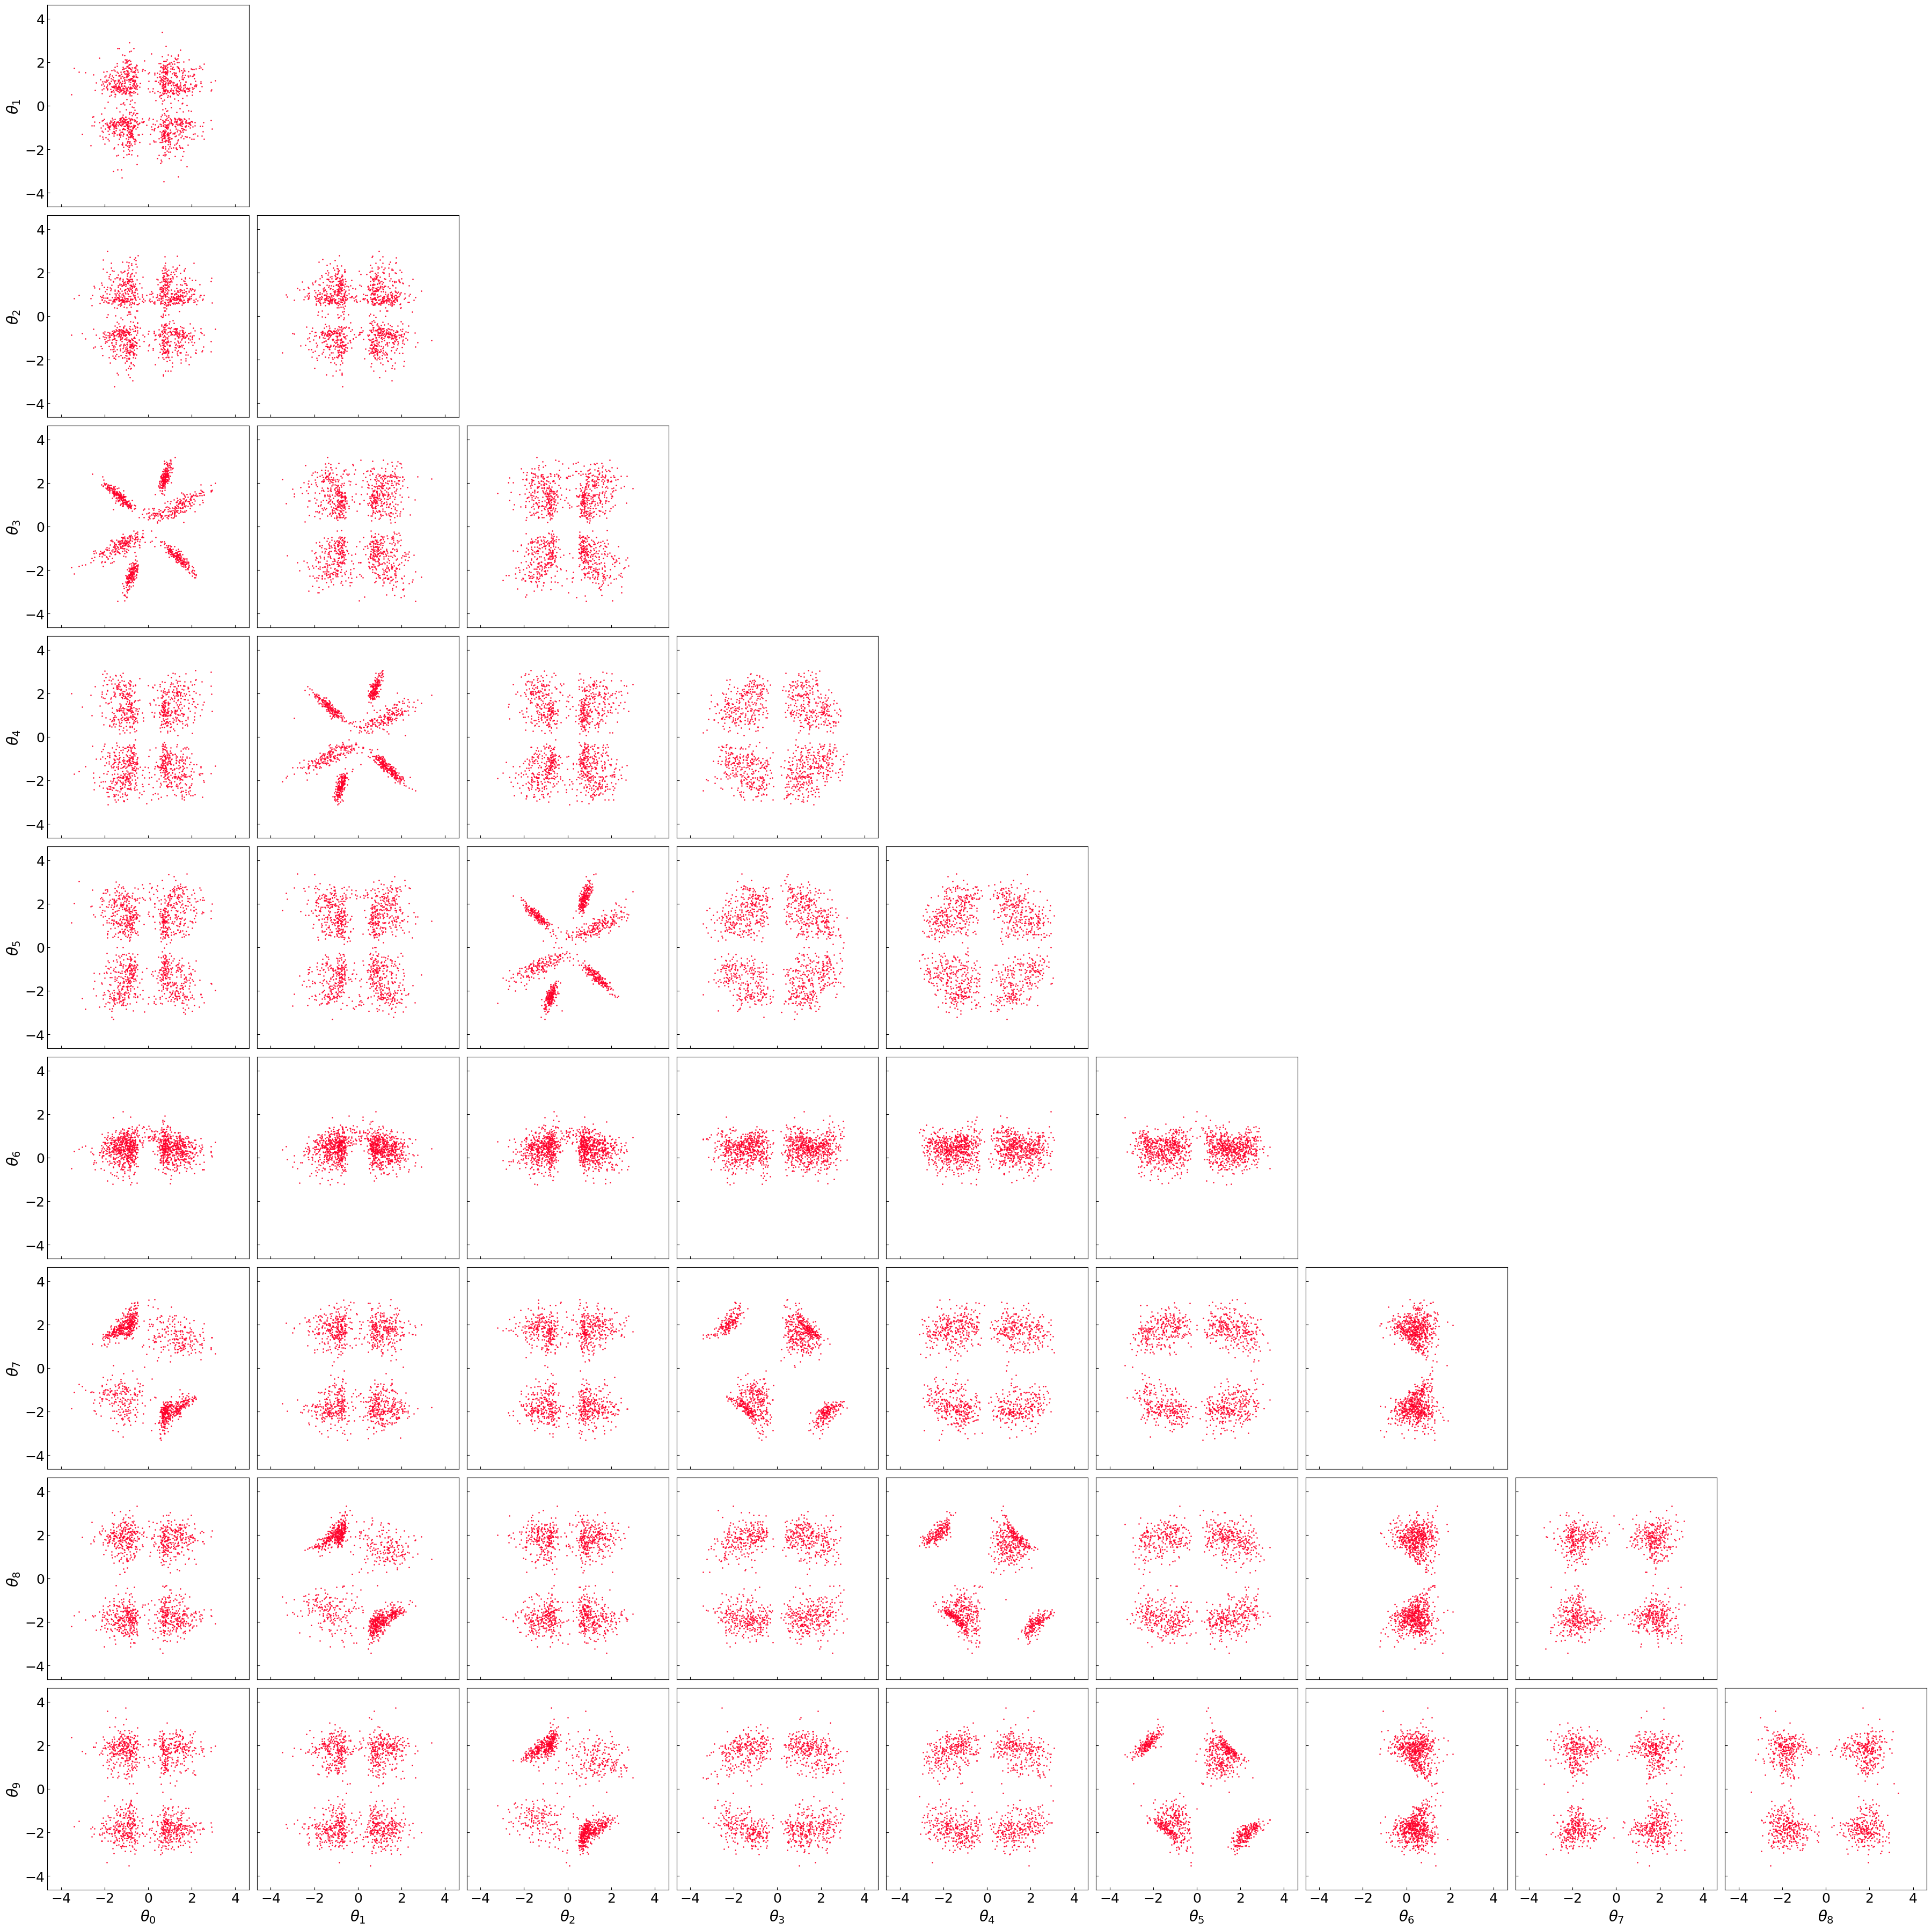

In [12]:
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.8,
            size=1.0,
            grid=False
        ),
        label_size=20,
        #cmap=matplotlib.cm.get_cmap("rainbow"),
        univariate=False
    )
)
figure.plot(
    data_list=[result.samples["parameters"]],
    textsize=20
)

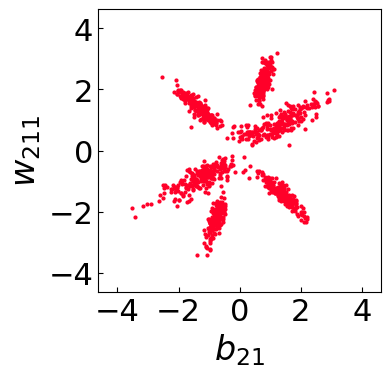

In [13]:
figure = visualization.PaperFigureBivariate(
    settings=settings.SettingsPaperFigureBivariate(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=4.0,
            grid=False
        ),
        label_size=20,
        #cmap=matplotlib.cm.get_cmap("rainbow"),
        univariate=False
    )
)
figure.plot(
    data_list=[
        result.samples["parameters"],
        #structured_sequential_samples_parameters.samples_parameters
    ],
    scatter_index_0=0,
    scatter_index_1=3,
    univariate_index=0,
    labels=[r"$w_{211}$", r"$b_{21}$"],
    rasterized=True,
    textsize=24
)

In [14]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "first.pdf"), bbox_inches="tight", transparent=True, dpi=300)

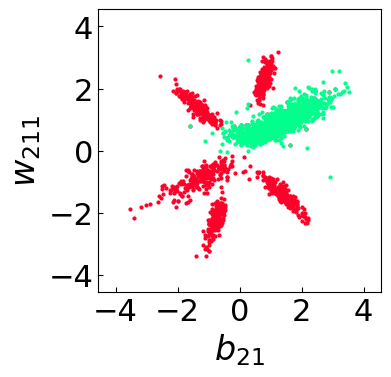

In [15]:
figure = visualization.PaperFigureBivariate(
    settings=settings.SettingsPaperFigureBivariate(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=4.0,
            grid=False
        ),
        label_size=20,
        #cmap=matplotlib.cm.get_cmap("rainbow"),
        univariate=False
    )
)
figure.plot(
    data_list=[
        result.samples["parameters"],
        structured_sequential_samples_parameters.samples_parameters
    ],
    scatter_index_0=0,
    scatter_index_1=3,
    univariate_index=0,
    labels=[r"$w_{211}$", r"$b_{21}$"],
    rasterized=True,
    textsize=24
)

In [16]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "second.pdf"), bbox_inches="tight", transparent=True, dpi=300)